In [1]:
import zipfile
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(25)

In [2]:
neu_faces = {}
with zipfile.ZipFile("eigenface_dataset.zip", "r") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith("a.jpg"):
            continue # not a face picture
        #with facezip.open(filename) as image:
        image = facezip.read(filename)
        neu_faces[filename] = cv2.imread(filename, 0)

[ WARN:0@11.708] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._134a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@11.710] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._7a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@11.710] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._83a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@11.711] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._163a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@11.712] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._175a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@11.712] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._122a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@11.713] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._95a.jpg'): can't open/read 

In [3]:
smi_faces = {}
with zipfile.ZipFile("eigenface_dataset.zip", "r") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith("b.jpg"):
            continue # not a face picture
        #with facezip.open(filename) as image:
        image = facezip.read(filename)
        smi_faces[filename] = cv2.imread(filename, 0)

[ WARN:0@12.702] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._60b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12.703] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._138b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12.703] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._21b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12.704] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._179b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12.705] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._196b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12.705] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._76b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12.706] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._99b.jpg'): can't open/read 

In [4]:
neu_faces = {k: v for k, v in neu_faces.items() if v is not None}
smi_faces = {k: v for k, v in smi_faces.items() if v is not None}

In [5]:
list(neu_faces.keys())[:5]

['upload_dataset/134a.jpg',
 'upload_dataset/7a.jpg',
 'upload_dataset/83a.jpg',
 'upload_dataset/163a.jpg',
 'upload_dataset/175a.jpg']

In [6]:
list(smi_faces.keys())[:5]

['upload_dataset/60b.jpg',
 'upload_dataset/138b.jpg',
 'upload_dataset/21b.jpg',
 'upload_dataset/179b.jpg',
 'upload_dataset/196b.jpg']

## Show first 16 faces Sanity

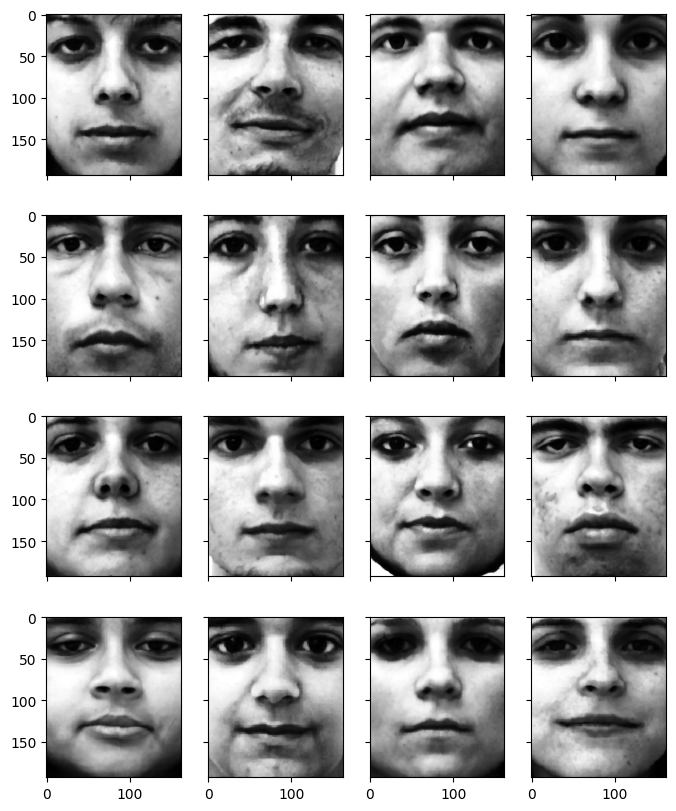

In [7]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
neu_faceimages = list(neu_faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(neu_faceimages[i], cmap="gray")
plt.show()

In [8]:
# get face shape
faceshape = list(neu_faces.values())[0].shape
print(faceshape)

(193, 162)


### Question 1

In [9]:
#select 100 random keys of NEUTRAL FACES
rand_neukeys = random.sample(list(neu_faces),100)
rand_neu = {k: v for k, v in neu_faces.items() if k in rand_neukeys}

(31266, 100)


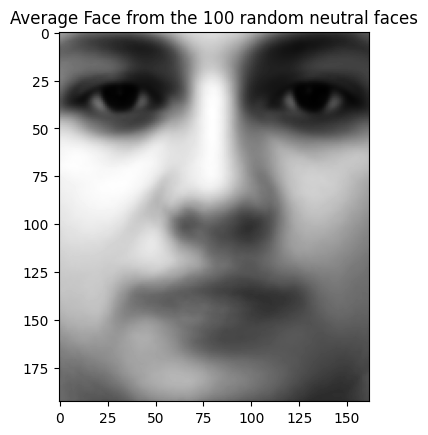

In [10]:
avg_list = np.array([np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]).T
avg_list = np.vstack(avg_list)
print(avg_list.shape)
faceArr = []
for i in range(31266):
    faceArr.append(np.mean(avg_list[i]))

avg_face = np.array(faceArr)
avFace = avg_face.reshape(193,162)
plt.imshow(avFace, cmap="gray")
plt.title("Average Face from the 100 random neutral faces")
plt.show()

In [11]:
#flatten the neutral faces (store as columns) and subtract by the avg
flat_neu = np.array([np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]).T
flat_neu = np.vstack(flat_neu)
print(flat_neu.shape)

(31266, 100)


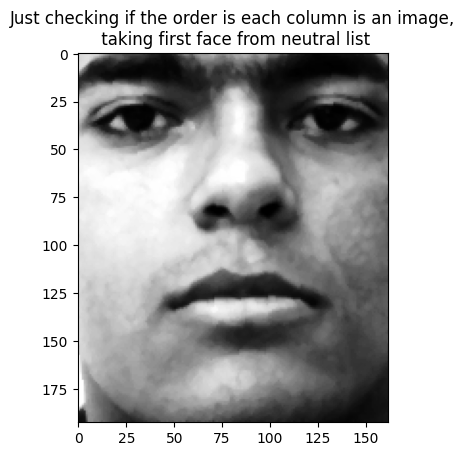

In [12]:
facecol = flat_neu[:,0].reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.title("Just checking if the order is each column is an image,\n taking first face from neutral list")
plt.show()

In [13]:
#normalize
Aneuface = flat_neu - np.tile(avg_face, (100,1)).T
print(Aneuface.shape)

(31266, 100)


In [14]:
#Get SVD here
u,s,vt = np.linalg.svd(Aneuface)
print(u.shape)
print(s.shape)
print(vt.shape)

(31266, 31266)
(100,)
(100, 100)


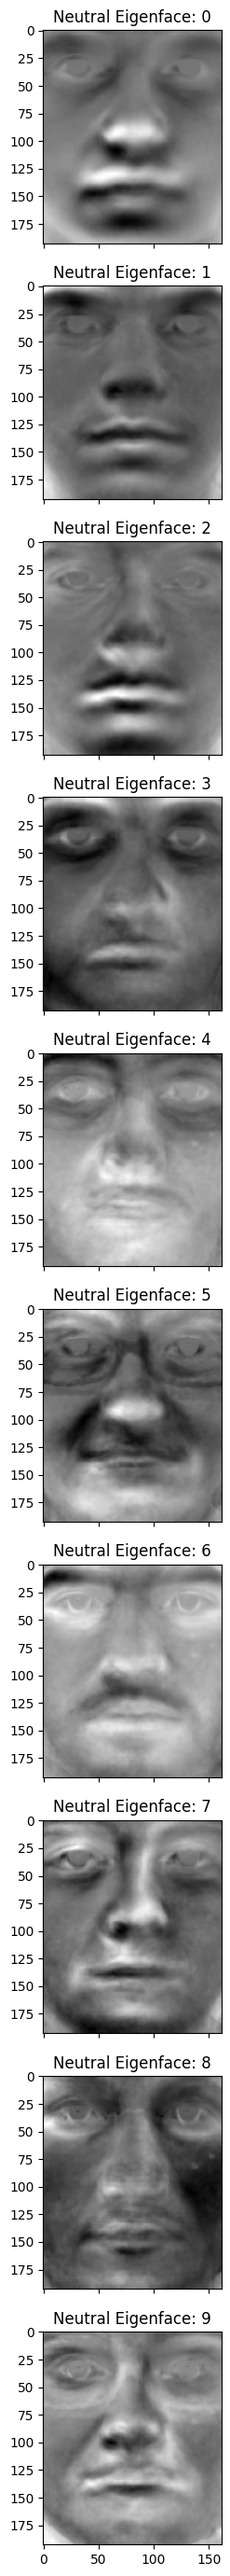

In [15]:
#print eigenfaces using u from svd
fig, axes = plt.subplots(10,1,sharex=True,sharey=True,figsize=(35,35))
for i in range(10):
    axes[i].imshow(u[:,i].reshape(193,162), cmap="gray")
    axes[i].set_title("Neutral Eigenface: " + str(i))
plt.show()

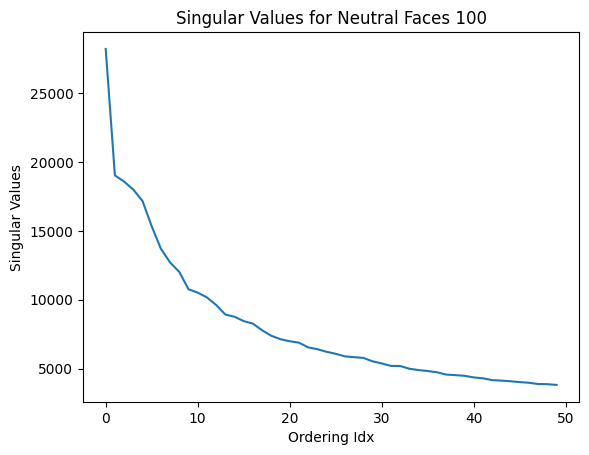

In [17]:
#plot S from SVD of neutral
plt.plot(range(50), s[:50])
plt.title("Singular Values for Neutral Faces 100")
plt.ylabel("Singular Values")
plt.xlabel("Ordering Idx")
plt.show()

### 1b SMILING

In [18]:
rand_smikeys = [i.replace("a.jpg", "b.jpg") for i in rand_neukeys]
rand_smi = {k: v for k, v in smi_faces.items() if k in rand_smikeys}

(31266, 100)


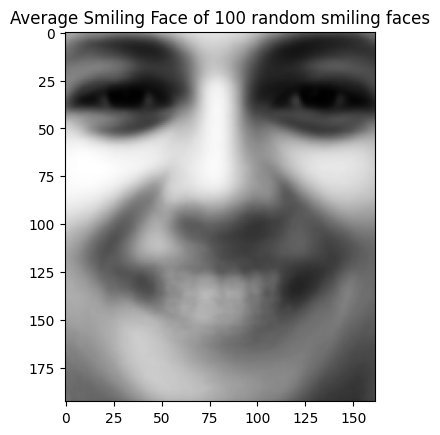

In [19]:
smi_avg_list = np.array([np.array(rand_smi[key].flatten().tolist()) for key in rand_smi]).T
smi_avg_list = np.vstack(smi_avg_list)
print(smi_avg_list.shape)
faceSmiArr = []
for i in range(31266):
    faceSmiArr.append(np.mean(smi_avg_list[i]))

avg_smiface = np.array(faceSmiArr)
avSmFace = avg_smiface.reshape(193,162)
plt.imshow(avSmFace, cmap="gray")
plt.title("Average Smiling Face of 100 random smiling faces")
plt.show()

In [20]:
#flatten the smile faces
flat_smi = np.array([np.array(rand_smi[key].flatten().tolist()) for key in rand_smi]).T
flat_smi = np.vstack(flat_smi)
print(flat_smi.shape)

(31266, 100)


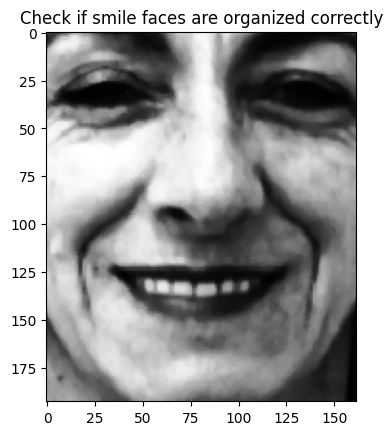

In [21]:
facecol = flat_smi[:,0].reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.title("Check if smile faces are organized correctly")
plt.show()

In [22]:
#normalize faces
Smface = flat_smi - np.tile(avg_smiface, (100,1)).T
print(Smface.shape)

(31266, 100)


In [23]:
su, ss, svt = np.linalg.svd(Smface)

In [24]:
print(su.shape)
print(ss.shape)
print(svt.shape)

(31266, 31266)
(100,)
(100, 100)


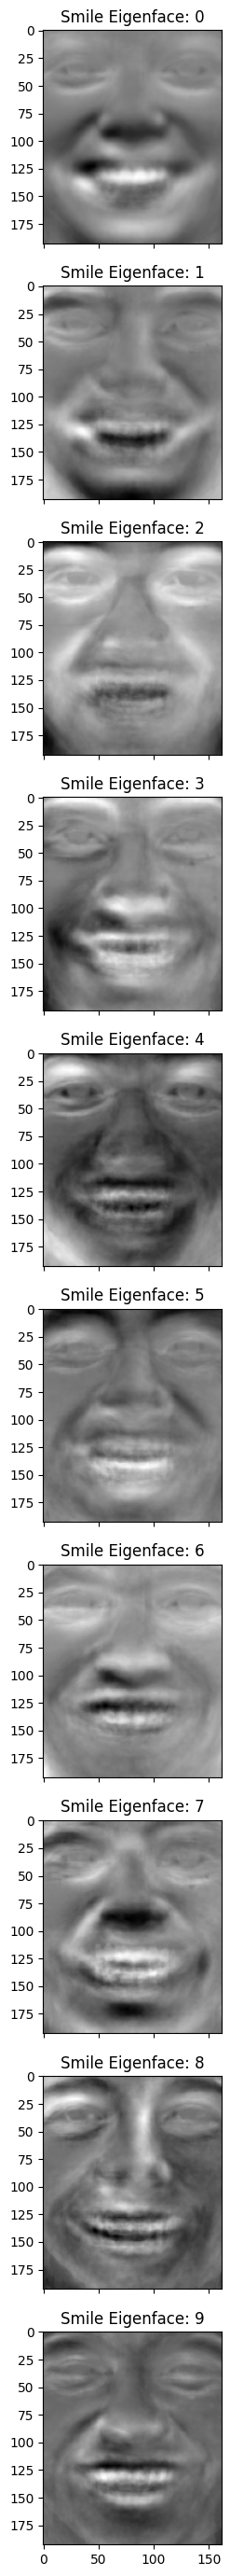

In [25]:
#print eigenfaces using su from svd
fig, axes = plt.subplots(10,1,sharex=True,sharey=True,figsize=(35,35))
for i in range(10):
    axes[i].imshow(su[:,i].reshape(193,162), cmap="gray")
    axes[i].set_title("Smile Eigenface: " + str(i))
plt.show()

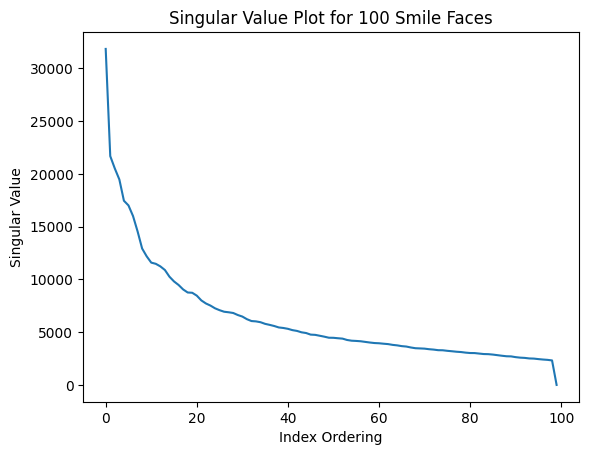

In [26]:
plt.plot(range(100), ss[:100])
plt.title("Singular Value Plot for 100 Smile Faces")
plt.ylabel("Singular Value")
plt.xlabel("Index Ordering")
plt.show()

## Question 2

(31266,)


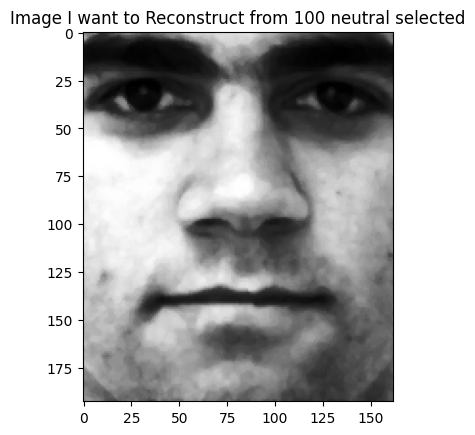

In [27]:
#image I want to reconstruct
recon_neuimg = np.array(flat_neu[:,5])
print(recon_neuimg.shape)
facecol = recon_neuimg.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.title("Image I want to Reconstruct from 100 neutral selected")
plt.show()

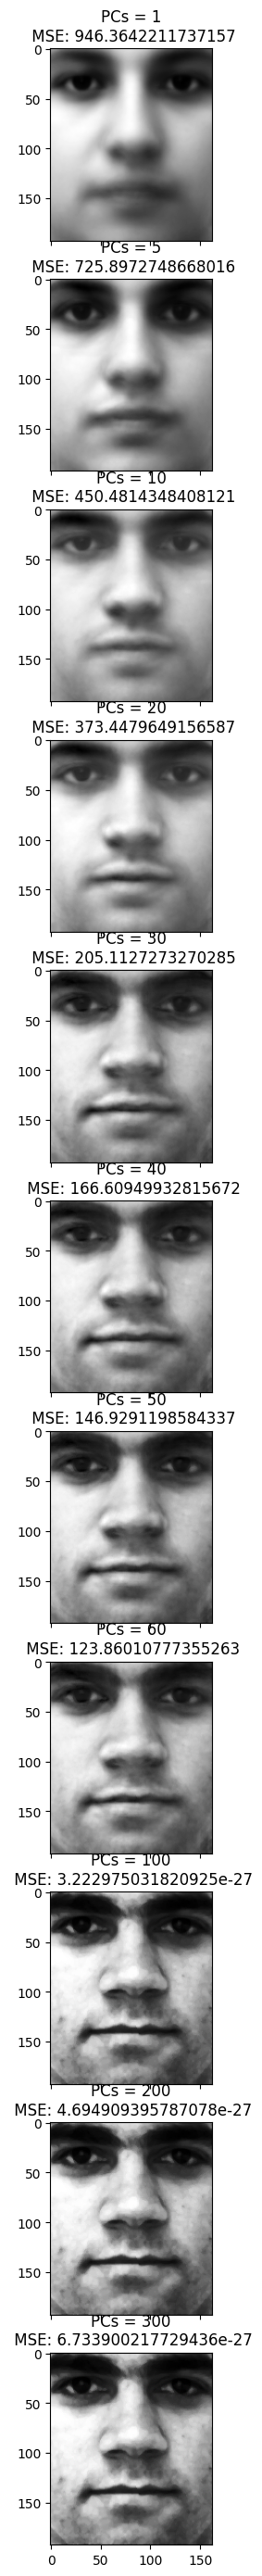

In [57]:
neu_PCA_list = [1,5,10,20,30,40,50,60,100,200,300]
fig, axes = plt.subplots(len(neu_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
neu_recon = []
neu_err = []
for k in neu_PCA_list:
    #get weights
    #need the image subtracted by avg since the eq is xi-avg = sum()
    weights = np.linalg.pinv(u[:,:k]).dot(recon_neuimg-avg_face)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(u[:,:k], weights), avg_face)

    neu_err.append(np.square(np.subtract(recon_neuimg,recon_img.flatten())).mean())
    neu_recon.append(recon_img)

for i in range(len(neu_PCA_list)):
    axes[i].imshow(neu_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("PCs = " + str(neu_PCA_list[i])  + "\n MSE: " + str(neu_err[i]))
plt.show()

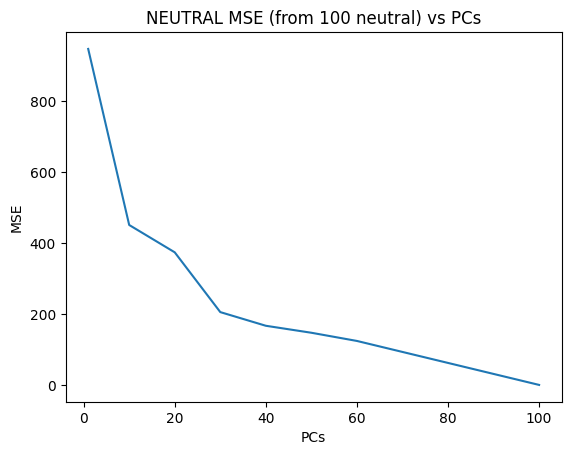

In [29]:
plt.plot(neu_PCA_list, neu_err)
plt.xlabel("PCs")
plt.ylabel("MSE")
plt.title("NEUTRAL MSE (from 100 neutral) vs PCs")
plt.show()

## Question 3

(31266,)


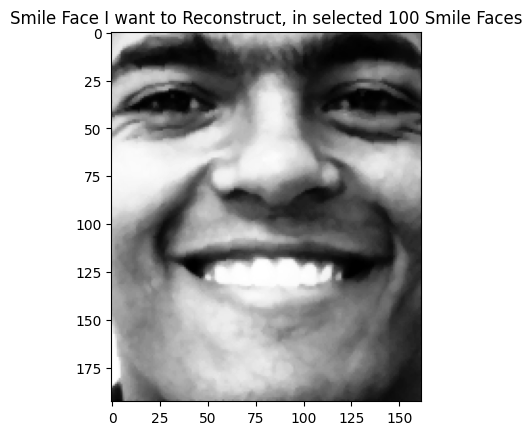

In [30]:
#smile image I want to reconstruct
recon_smiimg = np.array(flat_smi[:, 5])
print(recon_smiimg.shape)
facecol = recon_smiimg.reshape(193, 162)
plt.imshow(facecol, cmap="gray")
plt.title("Smile Face I want to Reconstruct, in selected 100 Smile Faces")
plt.show()

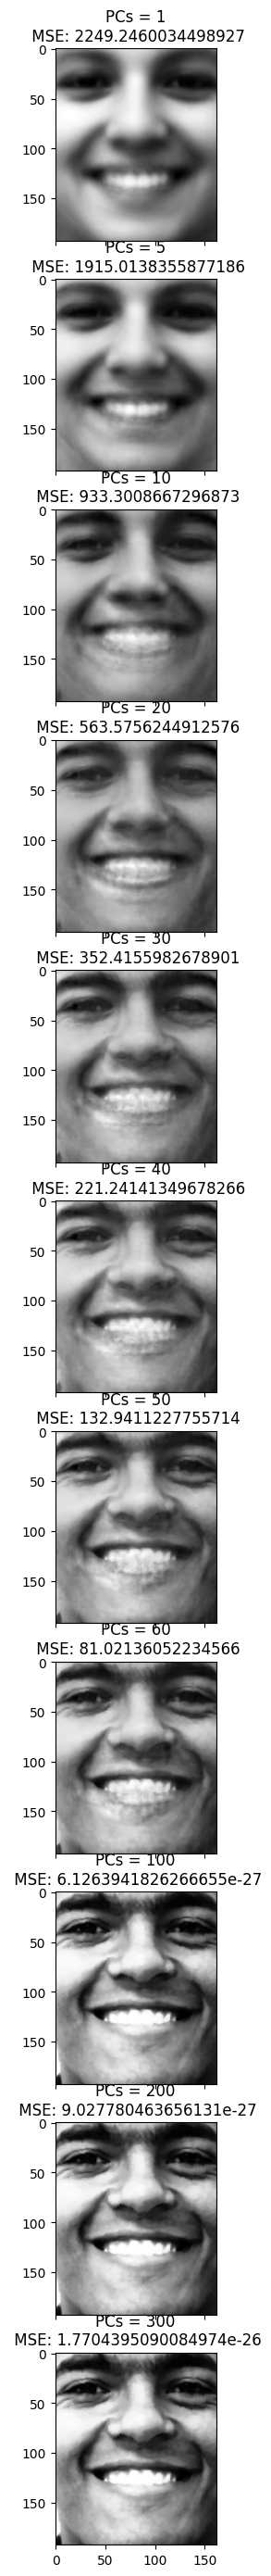

In [56]:
smi_PCA_list = [1,5,10,20,30,40,50,60,100, 200, 300]

fig, axes = plt.subplots(len(smi_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
smi_recon = []
smi_err = []
for k in smi_PCA_list:
    weights = np.linalg.pinv(su[:,:k]).dot(recon_smiimg-avg_smiface)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(su[:,:k], weights), avg_smiface)
    smi_err.append(np.square(np.subtract(recon_smiimg, recon_img.flatten())).mean())
    smi_recon.append(recon_img)


for i in range(len(smi_PCA_list)):
    axes[i].imshow(smi_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("PCs = " + str(smi_PCA_list[i])  + "\n MSE: " + str(smi_err[i]))
plt.show()

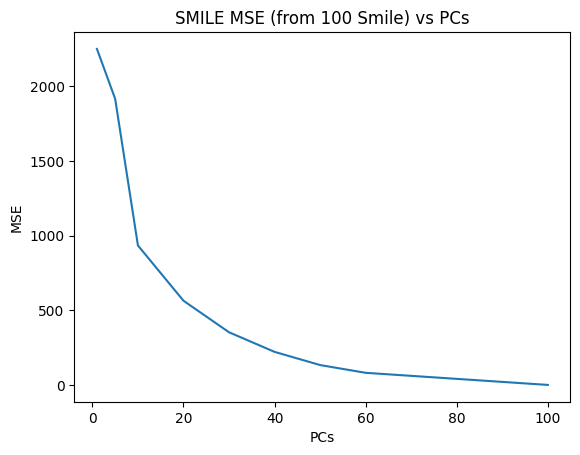

In [32]:
plt.plot(smi_PCA_list, smi_err)
plt.xlabel("PCs")
plt.ylabel("MSE")
plt.title("SMILE MSE (from 100 Smile) vs PCs")
plt.show()

## Question 4
## Select Random Face Neutral that isnt in training

In [33]:
not_neu_face = []
for i in neu_faces:
    if i not in rand_neukeys:
        not_neu_face = neu_faces[i]
        break

(31266,)


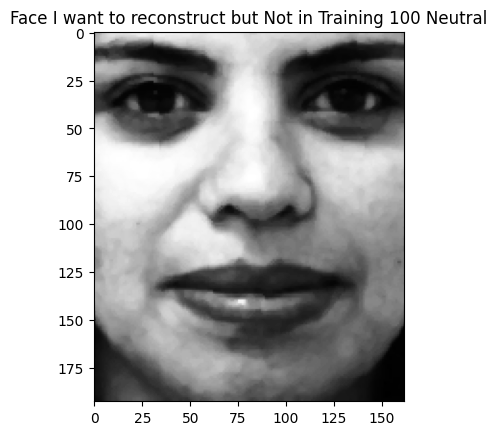

In [34]:
not_neu_face = np.array(not_neu_face).flatten()
print(not_neu_face.shape)
facecol = not_neu_face.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.title("Face I want to reconstruct but Not in Training 100 Neutral")
plt.show()

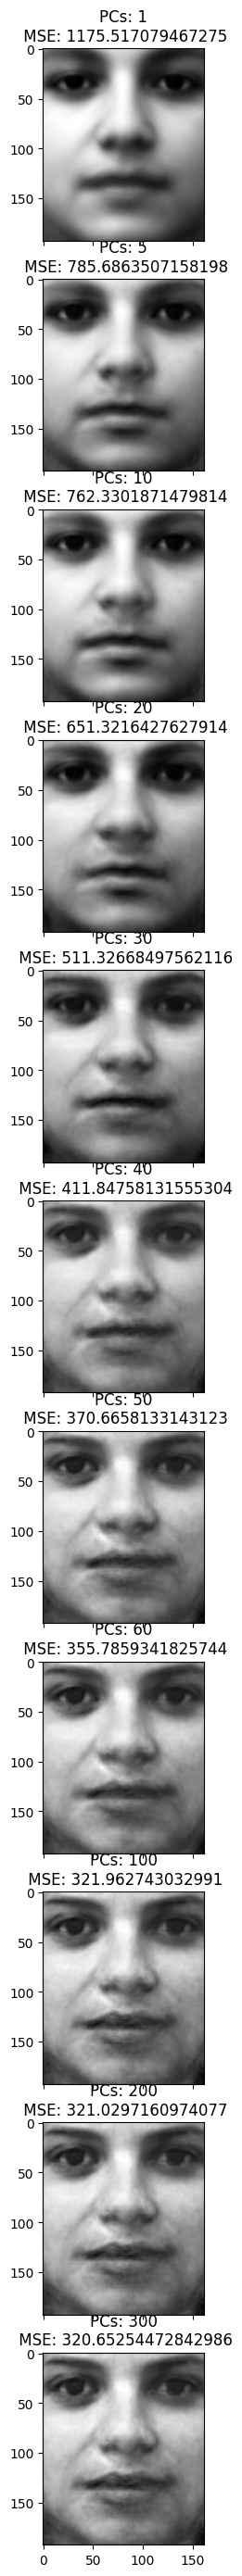

In [36]:
nonneu_PCA_list = [1,5,10,20,30,40,50,60,100, 200, 300]

fig, axes = plt.subplots(len(nonneu_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
nonn_recon = []
nonn_err = []
for k in nonneu_PCA_list:
    weights = np.linalg.pinv(u[:,:k]).dot(not_neu_face-avg_face)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(u[:,:k], weights), avg_face)
    nonn_err.append(np.square(np.subtract(not_neu_face, recon_img.flatten())).mean())
    nonn_recon.append(recon_img)

for i in range(len(nonneu_PCA_list)):
    axes[i].imshow(nonn_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("PCs: " + str(nonneu_PCA_list[i]) + "\n MSE: " + str(nonn_err[i]))
plt.show()

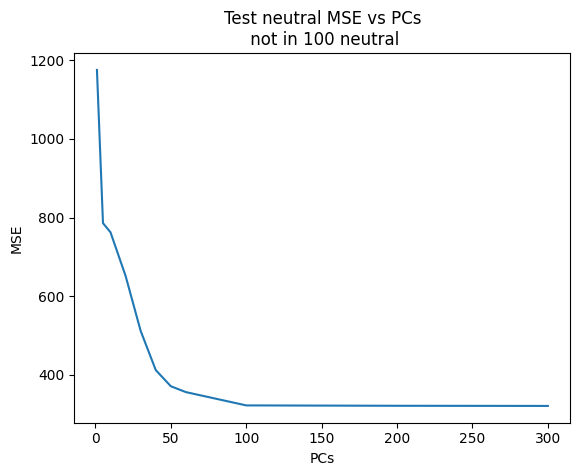

In [37]:
plt.plot(nonneu_PCA_list, nonn_err)
plt.xlabel("PCs")
plt.ylabel("MSE")
plt.title("Test neutral MSE vs PCs\n not in 100 neutral")
plt.show()

## 4b SMILE TEST BUT NOT IN SMILE TRAIN

In [38]:
not_smi_face = []
for i in smi_faces:
    if i not in rand_smikeys:
        not_smi_face = smi_faces[i]
        break

(31266,)


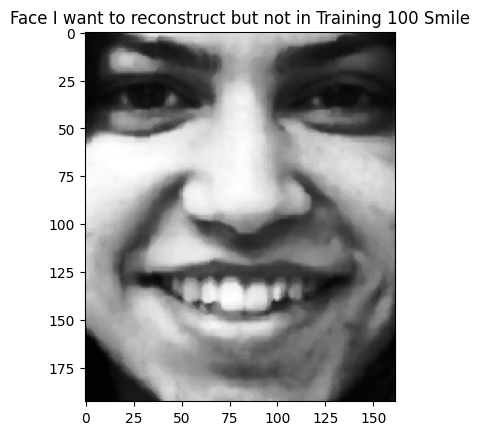

In [39]:
not_smi_face = np.array(not_smi_face).flatten()
print(not_smi_face.shape)
facecol = not_smi_face.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.title("Face I want to reconstruct but not in Training 100 Smile")
plt.show()

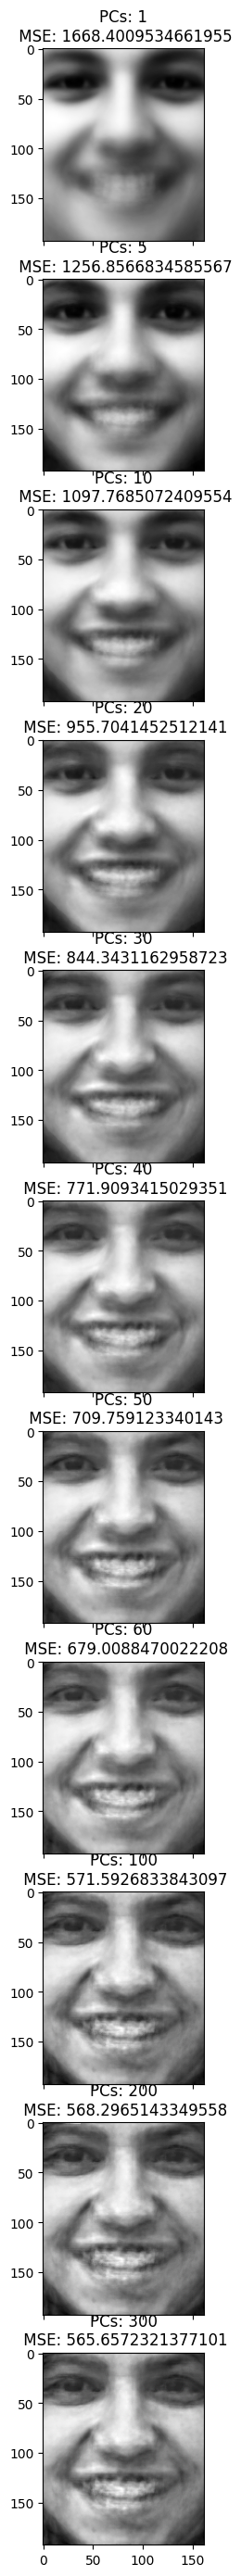

In [40]:
nonsmi_PCA_list = [1,5,10,20,30,40,50,60,100,200,300]

fig, axes = plt.subplots(len(nonsmi_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
nons_recon = []
nons_err = []
for k in nonsmi_PCA_list:
    weights = np.linalg.pinv(su[:,:k]).dot(not_smi_face-avg_smiface)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(su[:,:k], weights), avg_smiface)
    nons_err.append(np.square(np.subtract(not_smi_face, recon_img.flatten())).mean())
    nons_recon.append(recon_img)

for i in range(len(nonsmi_PCA_list)):
    axes[i].imshow(nons_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("PCs: " + str(nonsmi_PCA_list[i]) + "\n MSE: " + str(nons_err[i]))
plt.show()

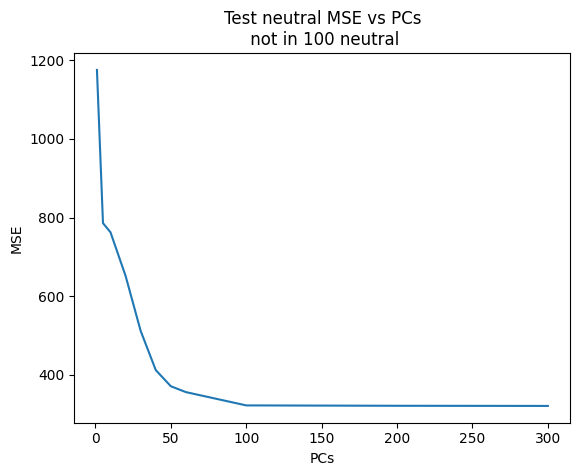

In [41]:
plt.plot(nonneu_PCA_list, nonn_err)
plt.xlabel("PCs")
plt.ylabel("MSE")
plt.title("Test neutral MSE vs PCs\n not in 100 neutral")
plt.show()

## Question 5

In [42]:
np.random.seed(25)

In [43]:
not_neu_list = {k: v for k, v in neu_faces.items() if k not in rand_neukeys}
not_smi_list = {k: v for k, v in smi_faces.items() if k not in rand_smikeys}

In [44]:
test_60 = []
for i in reversed(not_neu_list):
    test_60.append([i, np.array(neu_faces[i]).flatten()])
    if len(test_60) == 30:
        break
for i in reversed(not_smi_list):
    test_60.append([i, np.array(smi_faces[i]).flatten()])
    if len(test_60) == 60:
        break

In [45]:
def MSE(predict, labels):
    diff = [(x-y)**2 for x,y in zip(predict,labels)]
    return sum(diff) / len(diff)

In [46]:
k = 20
#Use only 1 k that you found in PCA

#fig, axes = plt.subplots(60,1,sharex=True,sharey=True,figsize=(35,35))
n_recon = []
n_mse = []
s_recon = []
s_mse = []
smile = []
neutral = []

for g in range(60):
    nweights = np.linalg.pinv(u[:,:k]).dot(test_60[g][1]-avg_face)
    #add mean with weights mult
    nrecon = np.add(np.matmul(u[:,:k], nweights), avg_face)
    #n_mse.append(np.square(np.subtract(test_60[g][1], nrecon.flatten())).mean())
    n_mse.append(MSE(test_60[g][1], nrecon.flatten()))
    n_recon.append(nrecon)

    sweights = np.linalg.pinv(su[:,:k]).dot(test_60[g][1]-avg_smiface)
    #add mean with weights mult
    srecon = np.add(np.matmul(su[:,:k], sweights), avg_smiface)
    #s_mse.append(np.square(np.subtract(test_60[g][1], srecon.flatten())).mean())
    s_mse.append(MSE(test_60[g][1], srecon.flatten()))
    s_recon.append(srecon)

    print("n %s, s %s",test_60[g][0], n_mse[g],s_mse[g])
    if n_mse[g] <= s_mse[g]:
        neutral.append(test_60[g])
    else:
        smile.append(test_60[g])

n %s, s %s upload_dataset/43a.jpg 467.15546148184103 746.1927258896936
n %s, s %s upload_dataset/55a.jpg 795.1007450668948 1608.3489415824056
n %s, s %s upload_dataset/38a.jpg 572.8347469670906 1017.3569862636963
n %s, s %s upload_dataset/140a.jpg 945.0244048932742 1735.2586917509186
n %s, s %s upload_dataset/117a.jpg 406.0753489043684 789.5236326909471
n %s, s %s upload_dataset/59a.jpg 593.8987352950417 1450.7580872866552
n %s, s %s upload_dataset/156a.jpg 723.7900315757229 1229.4641577521181
n %s, s %s upload_dataset/75a.jpg 933.1132138890299 1025.4574798496888
n %s, s %s upload_dataset/157a.jpg 762.992055080221 1398.9465932780745
n %s, s %s upload_dataset/58a.jpg 465.862527970349 613.2492478480176
n %s, s %s upload_dataset/141a.jpg 794.043807581099 1562.377984744401
n %s, s %s upload_dataset/161a.jpg 387.85255079251687 697.8048211718282
n %s, s %s upload_dataset/177a.jpg 1045.4901608291093 984.2474551953125
n %s, s %s upload_dataset/198a.jpg 559.1927393802872 1136.7452210799613
n %s

In [47]:
neu_accurate = len(list(filter(lambda x: x[0].endswith("a.jpg"), neutral)))
neu_wrong = list(filter(lambda x: x[0].endswith("b.jpg"), neutral))
print(neu_accurate)
print(neu_accurate/len(neutral))

29
0.9666666666666667


In [54]:
smi_accurate = len(list(filter(lambda x: x[0].endswith("b.jpg"), smile)))
smi_wrong = list(filter(lambda x: x[0].endswith("a.jpg"), smile))
print(smi_accurate)
print(smi_accurate/len(smile))

29
0.9666666666666667


### Print Incorrect Neutral Face and Display in Report

[11 15 24 ...  6  4  3]


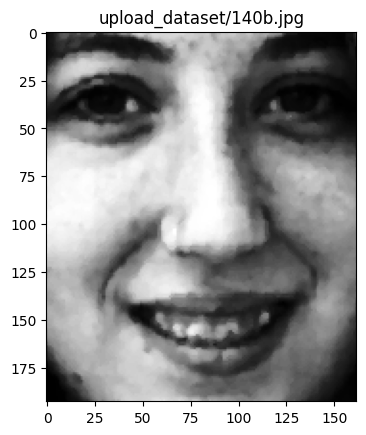

In [52]:
 #check if it is wrong (b.jpg)
fake_neutral = np.array(neu_wrong[0][1])
print(fake_neutral)
fakeNeu = fake_neutral.reshape(193, 162)
plt.imshow(fakeNeu, cmap="gray")
plt.title(neu_wrong[0][0])
plt.show()

## Print Incorrect Neutral Face and Display in Report

upload_dataset/177a.jpg
[236 236 239 ...  59  61  90]


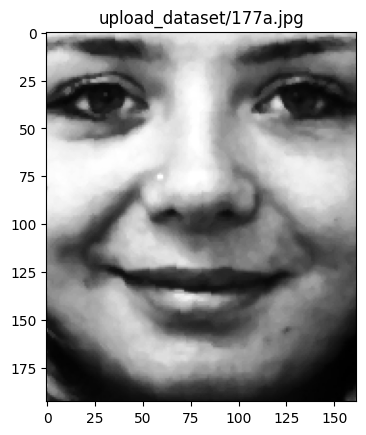

In [55]:
print(smi_wrong[0][0]) #check if it is wrong (a.jpg)
fake_smile = np.array(smi_wrong[0][1])
print(fake_smile)
fakeSmi = fake_smile.reshape(193,162)
plt.imshow(fakeSmi, cmap="gray")
plt.title(smi_wrong[0][0])
plt.show()